## Redukcja wymiarowości

### Co to i kiedy się tego używa?

Kiedy mamy ponad 3 zmienne to jak możemy je wszystkie sobie zwizualizować?

Czy jeżeli nie jesteśmy w stanie to czy w pełni rozumiemy zależności między nimi?

- Wizualizacja
- Feature selection
- Redukcja liczby zmiennych wrzucanych do modelu ML

## PCA - Principal Component Analysis

### O co chodzi w skrócie?

Mamy wiele wymiarów/zmiennych i chcemy "połączyć" ze sobą skorelowane ze sobą zmienne jednocześnie tracąc jak najmniej informacji robiąc to.

Takie "połączone" zmienne nazywamy komponentami i możemy dla każdego z komponentów określić jaką część wariancji/zróżnicowania zbioru danych tłumaczą.

Biorąć top 2-3 komponenty (topowe pod względem tłumaczonej wariancji) możemy sobie je zwizualizować, czego nie mogliśmy zrobić mając 4+ wymiarową przestrzeń.

W takiej wizualizacji obserwacje które są podobne do siebie pod względem tych komponentów będą blisko siebie na wykresie.

![](ml_introduction_pictures/pca.png)

### Jak działa algorytm?

PCA można porównac do próby objęcia chmury punktów/obserwacji n-wymiarowym elipsoidem, gdzie każda z osi tego elipsoidu jest jednym z principal komponentów. Jeżeli jakaś oś jest mała, to wariancja jaką tłumaczy dana oś też jest niewielka i jeżeli pominiemy tą oś to nie tracimy zbyt dużo obserwacji

![](ml_introduction_pictures/pca_elipsoid.jpg)

### W PCA bardzo ważne jest przeskalowanie danych przed włączeniem!


#### 1. Centrujemy dane wokół zera (odejmujemy średnią od każdej obserwacji każdej zmiennej). Nie zmienia to odległości między obserwacjami.

#### 2. Dopasowujemy najlepszą możliwą funkcję liniową do chmury punktów, która przechodzi przez środek układu współrzędnych. To jest Principal Component numer 1 - PC1.

#### 3. Aby uzyskać PC2: Znowu szukamy najlepszą możliwą funckję liniową, która przechodzi przez punkt (0,0) i jest prostopadła do PC1. Każdy kolejny PC musi również przechodzić przez (0,0) i byś prostopadłym do wszystkich poprzednich PC.

![](ml_introduction_pictures/mean_centering.jpg)

![](ml_introduction_pictures/pca_components.png)

### Przykład

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('iris.csv',  sep = ',')

In [2]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
from sklearn.preprocessing import StandardScaler
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = df.loc[:, features].values
y = df.loc[:,['species']].values
x = StandardScaler().fit_transform(x) # średnia = 0, odchylenie standardowe = 1

In [4]:
scaled_x = pd.DataFrame.from_records(x)
scaled_x.columns = features
scaled_x

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
5,-0.537178,1.957669,-1.170675,-1.050031
6,-1.506521,0.800654,-1.341272,-1.181504
7,-1.021849,0.800654,-1.284407,-1.312977
8,-1.748856,-0.356361,-1.341272,-1.312977
9,-1.143017,0.106445,-1.284407,-1.444450


In [5]:
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(x)



In [6]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [7]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [8]:
pca.explained_variance_ratio_.cumsum()

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

In [9]:
data = pca.explained_variance_ratio_.cumsum()[::-1]

In [10]:
data

array([1.        , 0.99484807, 0.95800975, 0.72770452])

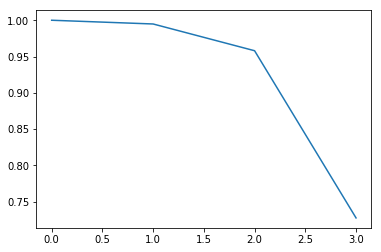

In [11]:
sns.lineplot(y =data, x = list(range(len(data))))

In [12]:
x[0]

array([-0.90068117,  1.03205722, -1.3412724 , -1.31297673])

In [13]:
principalComponents[0]

array([-2.26454173,  0.5057039 , -0.12194335, -0.02307332])

In [14]:
pca.transform([x[0]])

array([[-2.26454173,  0.5057039 , -0.12194335, -0.02307332]])

In [15]:
np.dot( pca.components_, x[0])

array([-2.26454173,  0.5057039 , -0.12194335, -0.02307332])

In [16]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
                           , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)

In [17]:
# Skumulowana wariancja tłumaczona przez komponenty
pca.explained_variance_ratio_.cumsum()

array([0.72770452, 0.95800975])

In [18]:
finalDf

,principal component 1,principal component 2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
5,-2.070537,1.518549,setosa
6,-2.445711,0.074563,setosa
7,-2.233842,0.247614,setosa
8,-2.341958,-1.095146,setosa
9,-2.188676,-0.448629,setosa


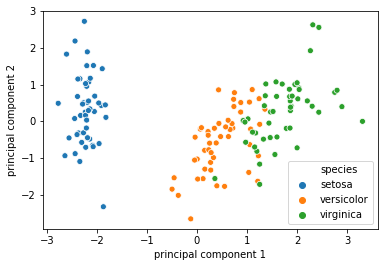

In [19]:
sns.scatterplot(data = finalDf, x = 'principal component 1', y = 'principal component 2', hue='species')

PCA może też odtworzyć to jak wyglądałyby dane wejściowe z użyciem niższej liczby wymiarów (za pomocą komponentów).
![](ml_introduction_pictures/pca_reconstruction.png)
Źródło: https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb

## t-SNE - t-Distributed Stochastic Neighbor Embedding

### O co chodzi w skrócie?

Chcemy zwizualizować sobie klastry w danych w ten sposób, że odległości między klastrami w przestrzeni 2 lub 3 wymiarowej są proporcjonalne do odległości tych klastrów w oryginalnej, wielowymiarowej przestrzeni.

![](ml_introduction_pictures/tsne_transformation.png)

### Jak działa algorytm?

![](ml_introduction_pictures/tsne_random.png)

Co się dzieje dalej: http://projector.tensorflow.org/

#### Perplexity
The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Loosely speaking, one could say that a larger / denser dataset requires a larger perplexity. Typical values for the perplexity range between 5 and 50.

#### Learning rate
The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. If the cost function gets stuck in a bad local minimum increasing the learning rate may help.

Źródło: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

### Włączenie PCA i t-SNE na tych samych danych 

In [20]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

iris = load_iris()
scaled_iris = StandardScaler().fit_transform(iris.data)
X_tsne = TSNE(learning_rate=100, verbose=1, perplexity=40, n_iter=300).fit_transform(scaled_iris)
X_pca = PCA().fit_transform(scaled_iris)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.865807
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.016998
[t-SNE] KL divergence after 300 iterations: 0.120549


#### t-SNE

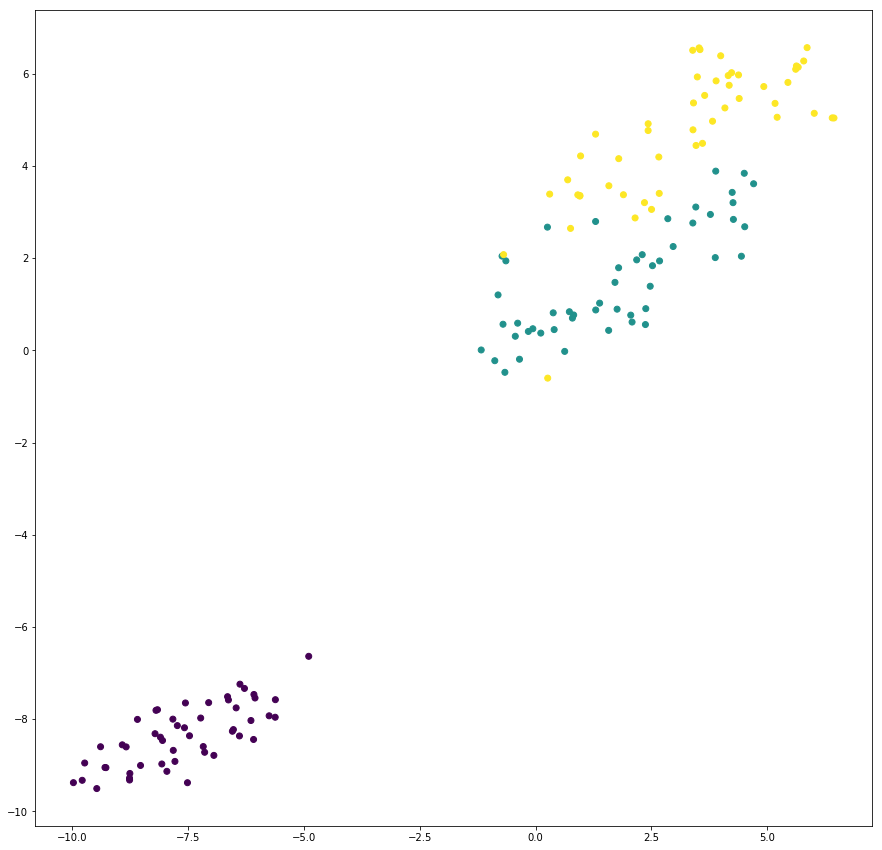

In [21]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)

#### PCA

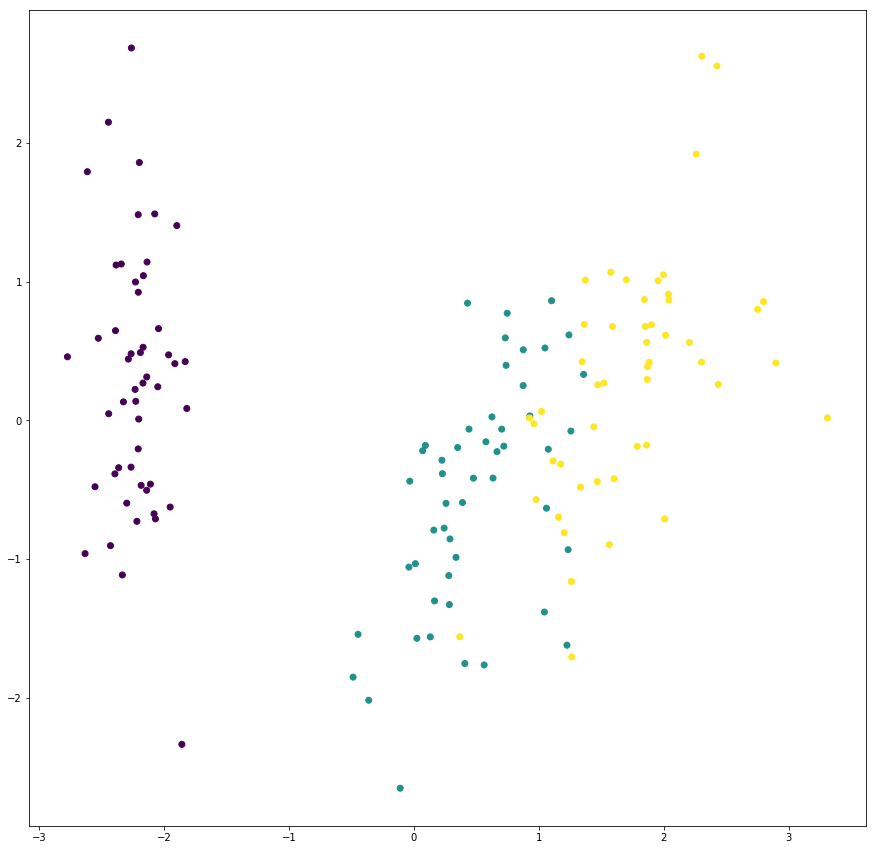

In [22]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, label=iris.target)

## PCA vs t-SNE

- PCA jest deterministyczne, t-SNE nie (zależy od pierwszego losowego rozrzucenia obserwacji)
- PCA możemy używać do przygotowania nowych zmiennych do modelu ML
- W PCA jasno możemy wytłumaczyć co oznacza dany komponent (kombinacja liniowa zmiennych wejściowych), w t-SNE widzimy próbę zachowania relacji między klastrami po zmniejszeniu liczby wymiarów 
- t-SNE nie zachowuje globalnych trendów w danych - skupia się na odległości między klastrami
- W obu algorytmach powinniśmy wykonać skalowanie danych (żeby wszystkie zmienne traktować z równą uwagą)
- Jeżeli mamy bardzo dużo zmiennych lepiej użyć PCA
- W t-SNE mamy więcej parametrów do ustawienia (learning rate, perplexity), ale pozwala to na odkrycie zależności w danych, których moglibyśmy nie znaleźć z użyciem innych technik redukcji wymiarów. Więcej info: https://distill.pub/2016/misread-tsne/